# Réseaux de neurones
### Perceptron multi-couches

CSI4506 Intelligence Artificielle  
Automne 2018  
Caroline Barrière

***

Nous allons vers le domaine médical pour ce notebook.  La tâche de classification supervisée que nous attaquons est à propos de la réadmission de patients diabétiques dans les hopitaux, et ce en lien avec plusieurs attributs décrivant leur état physique, les procédures médicales suivies, les médicaments prescrits, etc.

Tout *patient réadmis* est très dispendieux pour un système médical.  Cela montre, jusqu'à un certain point, qu'un patient a été retourné chez lui trop rapidement, avant qu'il se soit complètement rétabli.  L'ensemble de données que nous explorons classifie les réadmissions en trois valeurs: moins de 30 jours, plus de 30 jours, et aucune.

Ce notebook vous permettra de poursuivre votre compréhension de design expérimental pour l'apprentissage machine supervisé, en particulier la classification supervisée.  Cela vous permettra aussi de vous familiariser avec le perceptron multi-couches.

Nous ferons usage de deux packages: (1) **scikit-learn**, un très bon package pour l'apprentissage machine, avec lequel vous avez déjà expérimenté dans votre dernier notebook, et (2) **pandas**, un package très utile pour les sciences des données. Assurez-vous d'avoir installé la dernière version de scikit-learn (version 0.20), sinon certaines classes (le one-hot-encoder) ne fonctionneront pas.

Comme ce notebook est votre 5ième ce semestre, certaines instructions sont moins explicites. 

***

***DEVOIR***:  
Parcourir le notebook, en exécutant chaque cellule, une à une.  
Pour chaque **(TO DO)**, effectuer les tâches demandées.  
Quand vous avez terminé, signez et soumettez votre notebook.

***

**1. Obtenir le dataset**

D'abord, lisez la description du dataset sur la réadmission de patients diabétiques (https://www.kaggle.com/brandao/diabetes/home). 

Télécharger les données (fichier dataset_diabetes.zip) à partir de l'archive UCI:
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Dans le fichier *dataset_diabetes.zip*, vous trouverez un fichier appelé *diabetic_data.csv* que nous utiliserons pour notre expérimentation. 


**2. Explorer le dataset**  
Nous utiliserons le package *pandas* pour lire le fichier csv.  Cela crée une structure de donnée appelée *dataframe* qui contient toutes les données.

Si vous avez des erreurs en important les packages, c'est peut-être qu'ils ne sont pas installés.  Assurez-vous de faire *pip install package_name* à l'invite de commande pour installer les packages requis.

In [1]:
# import the required packages for data analysis and machine learning

import pandas as pd
import sklearn

Le code qui suit lit le fichier csv (qui j'ai mis dans un répertoire *Diabetes*, mais vous pouvez le mettre ailleurs). Ensuite, le code montre les 10 premières lignes du dataset.

In [2]:
# Read the dataset, show top rows

X = pd.read_csv("Diabetes/diabetic_data.csv")
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [4]:
# Examples of data exploration

print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO-DO - Q1)** Inspiré des quelques lignes de code ci-haut, écrivez du code pour répondre aux questions suivantes.  Vous pouvez faire une partie du processus manuellement (le code écrit devrait seulement vous aider à répondre aux questions). 

1. Combien d'exemples y a-t-il dans le dataset?
2. Combien d'attributs y a-t-il dans le dataset?
3. Quels sont les créneaux d'ages possibles, et le nombre d'exemples de chaque créneau?
4. Quelles sont les probabilités a prori de chaque classe (>30, NO, <30) ?
5. Y a-t-il des patients présents plus de 20 fois dans le dataset?

In [5]:
#1
print("1.")
print(str(X['encounter_id'].count()) + " examples")
print()

#2
print("2.")
print(str(len(list(X))) + " attributes")
print()

#3
print("3.")
print(X['age'].value_counts())
print()

#4
print("4.")
print("<30: " + str(X['age'].value_counts()['[0-10)'] + X['age'].value_counts()['[10-20)'] + X['age'].value_counts()['[20-30)']) + '/' + str(X['age'].count()) + ' = ' + str((X['age'].value_counts()['[0-10)'] + X['age'].value_counts()['[10-20)'] + X['age'].value_counts()['[20-30)'])/X['age'].count()*100) + '%')
print("NO: " + str(X['age'].value_counts()['[30-40)']) + '/' + str(X['age'].count()) + ' = ' + str(X['age'].value_counts()['[30-40)']/X['age'].count()*100) + '%')
print(">30: " + str(X['age'].value_counts()['[40-50)'] + X['age'].value_counts()['[50-60)'] + X['age'].value_counts()['[60-70)'] + X['age'].value_counts()['[70-80)'] +  X['age'].value_counts()['[80-90)'] + X['age'].value_counts()['[90-100)']) + '/' + str(X['age'].count()) + ' = ' + str((X['age'].value_counts()['[40-50)'] + X['age'].value_counts()['[50-60)'] + X['age'].value_counts()['[60-70)'] + X['age'].value_counts()['[70-80)'] +  X['age'].value_counts()['[80-90)'] + X['age'].value_counts()['[90-100)'])/X['age'].count()*100) + '%')
print()

#5
print("5.")
max_visits = max(X['patient_nbr'].value_counts())
answer = (max_visits > 20)
if answer:
    print("It is " + str(answer) + " that there are patients that have been present more than 20 times")

1.
101766 examples

2.
50 attributes

3.
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

4.
<30: 2509/101766 = 2.4654599768095435%
NO: 3775/101766 = 3.709490399544052%
>30: 95482/101766 = 93.82504962364641%

5.
It is True that there are patients that have been present more than 20 times


**3.  Préparer le dataset pour l'expérimentation**

Nous ferons 2 étapes pour préparer le data pour l'expérimentation: (1) extraire l'attribut correspondant à la classe que nous voulons prédire pour en faire notre *output*, (2) séparer le dataset en ensemble d'entraînement et ensemble de test.

In [6]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [7]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(y_test.shape)

(76324, 49)
(25442,)


**4. Encodage des entrées**

Nous avons vu en classe que les attributs multinomiaux doivent être encodés en attributs binaires avec une approche *one-hot* voulant dire qu'une seule valeur sera active à la fois.  Le code ci-bas permet de faire l'encodage.

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# since the dataset is quite large, try a subset of features, otherwise it takes a long time to learn
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# perform the one-hot encoder on the 3 features selected
ohe.fit(X_train_sf)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [9]:
# The one-hot-encoder renames the features

feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [10]:
# We can now encode the training and test set with the new features

X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO-DO - Q2)** - Combien d'attributs avons-nous après l'encodage?  Pourquoi y en a-t-il autant?  Montrer le format (*shape*) du dataset d'entraînement maintennant.

In [11]:
# We can see the shape of the training data
print ("There are " + str(X_train_sf_encoded.shape[1]) + " attributes after encoding. This is because the one-hot encoder binarizes features")
print(X_train_sf_encoded.shape)

There are 237 attributes after encoding. This is because the one-hot encoder binarizes features
(76324, 237)


**5. Entraîner le perceptron multi-couches**

In [12]:
# Import the models
from sklearn.neural_network import MLPClassifier
import datetime
import matplotlib.pyplot as plt

In [13]:
# Define the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

**(TO-DO - Q3)** - Expliquer les paramètres choisis ci-haut, et expliquer le "score" (utilisé ci-bas).   Vous pourrez regarder la document du MLPclassifier pour comprendre le score.

In [14]:
# The solver ‘lbfgs’ is an optimizer in the family of quasi-Newton methods. On relatively small datasets, it can converge faster and perform better.
# alpha is an L2 penalty (regularization term) parameter that helps in avoiding overfitting by penalizing weights with large magnitudes. A relatively small alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.
# hidden_layer_sizes=(100, 2) indicates that there will be 100 neurons at the first hidden layer and two at the second.
# random_state=1 is setting the seed used by the random number generator to 1. This allows us to better test different implementations / variations since we know that the generated values will be the same if the same seed is used.
# max_iter is the maximum number of iterations. Ensures termination in case there is no convergence. But if there is, convergence may happen before max_iter is reached.
# learning_rate_init is the initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
# When set to True, warm_start reuses the solution of the previous call to fit as initialization which may be more efficient.
# The score returns the mean accuracy on the given test data and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

# This steps trains the model
# ATTENTION - THIS CAN TAKE LONG IF YOU CHOSE MANY ITERATIONS AND/OR LARGE HIDDEN LAYERS
# Each iteration, on my machine, takes about 80 seconds.  Be patient.
scores_train = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf.fit(X_train_sf_encoded, y_train)
    score = clf.score(X_train_sf_encoded, y_train)
    scores_train.append(score)
# print(scores_train)

Iteration: 1-- 2018-11-13 12:27:51.185573
Iteration: 2-- 2018-11-13 12:28:33.535677
Iteration: 3-- 2018-11-13 12:29:25.047917
Iteration: 4-- 2018-11-13 12:30:07.750855
Iteration: 5-- 2018-11-13 12:30:51.847924
Iteration: 6-- 2018-11-13 12:31:37.538600
Iteration: 7-- 2018-11-13 12:32:22.548396
Iteration: 8-- 2018-11-13 12:33:08.947239
Iteration: 9-- 2018-11-13 12:33:54.077570


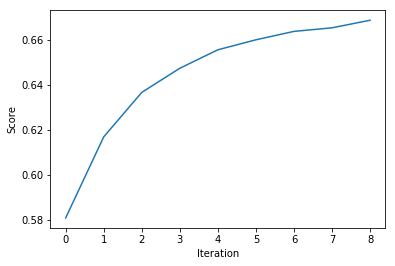

In [15]:
# plot the scores
plt.plot([i for i in range(len(scores_train))], scores_train)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

**(TO-DO : Q4) Décrivez ce que fait le code ci-bas.**

In [16]:
# Show the prediction on the first 10 examples
y_predicted = clf.predict(X_train_sf_encoded[0:10])
# Attempts to predict the age range given the based on the one-hot encoded features from the dataset for the first 10 elements of X_train_sf_encoded
print(y_predicted)
# Prints the prediction
print(y_train[0:10])
# Prints the first 10 values of the training set to compare the accuracy of the predictions
clf.predict_proba(X_train_sf_encoded[0:10])
# Prints the estimated probability of the sample for each class in the model

['>30' '>30' '>30' '>30' 'NO' '>30' 'NO' 'NO' 'NO' 'NO']
['>30' '>30' 'NO' '>30' 'NO' '>30' 'NO' 'NO' 'NO' '>30']


array([[0.18894038, 0.62089452, 0.1901651 ],
       [0.1755638 , 0.56041839, 0.26401781],
       [0.14986081, 0.4597297 , 0.39040949],
       [0.17701718, 0.56659569, 0.25638713],
       [0.11660739, 0.34312452, 0.54026809],
       [0.2018258 , 0.69808045, 0.10009375],
       [0.05156154, 0.13890218, 0.80953628],
       [0.1238236 , 0.36754571, 0.5086307 ],
       [0.08487096, 0.24016567, 0.67496337],
       [0.06556415, 0.1806506 , 0.75378525]])

**5. Tester le modèle obtenu (Multi-layer Perceptron)**

**(TO-DO : Q5)** Maintenant que le modèle est entraîné, évaluez-le sur l'ensemble de test.  Quel est le score?  Comment ce score se compare-t-il à celui obtenu sur l'ensemble d'entraînement?

In [17]:
# y_predicted = clf.predict(X_test_sf_encoded)
# print(y_predicted)
# print(y_test)
# clf.predict_proba(X_test_sf_encoded)

score1 = clf.score(X_test_sf_encoded, y_test)
print(score1)
if score1 < scores_train[-1]:
    print("Compared to the training set, the test set scores lower")
else:
    print("Compared to the training set, the test set scores higher")

0.4848282367738385
Compared to the training set, the score is lower


**6. Varier les hyperparamètres**

Plusieurs hyperparamètres peuvent être variés (nombre de couches cachées, taux d'apprentissage, etc).  Cela prend beaucoup de temps pour faire ces variations...

**(TO-DO - Q6)** - Refaire les expérimentations ci-haut(entraînement et test) en changeant l'architecture des niveaux cachés pour avoir 3 couches de 30 unités chacune.  NE MODIFIER PAS le code ci-haut, mais recopier la partie du code dont vous avez besoin et modifier la pour faire des tests (en utilisant de nouveaux noms de variables si nécessaire).  Comparer vos résultats avec ceux de la première expérimenation.  Est-ce mieux?  Conserver le meilleur modèle et tenter une autre modification, soit d'utiliser une fonction d'activation sigmoide.  Est-ce maintenant mieux ou moins bien?

Iteration: 1-- 2018-11-13 12:34:43.025658
Iteration: 2-- 2018-11-13 12:35:13.631616
Iteration: 3-- 2018-11-13 12:35:44.780036
Iteration: 4-- 2018-11-13 12:36:15.748509
Iteration: 5-- 2018-11-13 12:36:47.058337
Iteration: 6-- 2018-11-13 12:37:18.187482
Iteration: 7-- 2018-11-13 12:37:50.551768
Iteration: 8-- 2018-11-13 12:38:21.387014
Iteration: 9-- 2018-11-13 12:38:52.954645


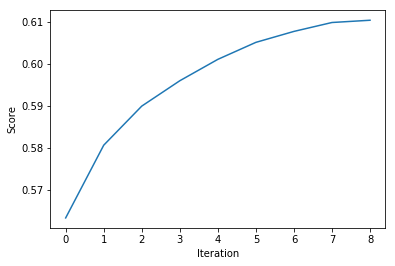

0.501139847496266
Compared to hidden_layer_sizes=(100,2), (30,30,30) scores higher
Iteration: 1-- 2018-11-13 12:39:24.735891
Iteration: 2-- 2018-11-13 12:39:28.768348
Iteration: 3-- 2018-11-13 12:39:29.988150
Iteration: 4-- 2018-11-13 12:39:31.130828
Iteration: 5-- 2018-11-13 12:39:32.314483
Iteration: 6-- 2018-11-13 12:39:33.566786
Iteration: 7-- 2018-11-13 12:39:34.859596
Iteration: 8-- 2018-11-13 12:39:36.126366
Iteration: 9-- 2018-11-13 12:39:37.269983


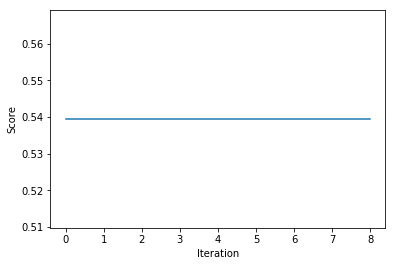

0.5382831538401069
Compared to default activation, sigmoid scores higher


In [18]:
# Define the model
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 30, 30), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)
scores_train2 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf2.fit(X_train_sf_encoded, y_train)
    score = clf2.score(X_train_sf_encoded, y_train)
    scores_train2.append(score)

plt.plot([i for i in range(len(scores_train2))], scores_train2)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

# y_predicted2 = clf2.predict(X_train_sf_encoded[0:10])
# print(y_predicted2)
# print(y_train[0:10])
# clf2.predict_proba(X_train_sf_encoded[0:10])

score2 = clf2.score(X_test_sf_encoded, y_test)
print(score2)
hidden_layers = -1
max_score = -1
if score1 > score2:
    print("Compared to hidden_layer_sizes=(100,2), (30,30,30) scores lower on the test set")
    hidden_layers = clf.hidden_layer_sizes
    max_score = score1
else:
    print("Compared to hidden_layer_sizes=(100,2), (30,30,30) scores higher on the test set")
    hidden_layers = clf2.hidden_layer_sizes
    max_score = score2

print()

clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=hidden_layers, activation='logistic', random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)
scores_train3 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf3.fit(X_train_sf_encoded, y_train)
    score = clf3.score(X_train_sf_encoded, y_train)
    scores_train3.append(score)

plt.plot([i for i in range(len(scores_train3))], scores_train3)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

# y_predicted3 = clf3.predict(X_train_sf_encoded[0:10])
# print(y_predicted3)
# print(y_train[0:10])
# clf3.predict_proba(X_train_sf_encoded[0:10])

score3 = clf3.score(X_test_sf_encoded, y_test)
print(score3)
if score3 > max_score:
    print("Compared to default activation, sigmoid scores higher on the test set")
else:
    print("Compared to default activation, sigmoid scores lower on the test set")

**(TO_DO - Q7 - Optional)** -- Comparer les résultats du perceptron multi-couches avec la régression logistique, aussi disponible dans sklearn. 

In [19]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# ....

#### Signature

Je, -------VOTRE NOM--------------, declare que les réponses inscrites dans ce notebook sont les miennes.

Oliver Charles Scott